In [1]:
import logging
import numpy as np  
from gensim.models import Doc2Vec
import os
import codecs

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)

WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


In [2]:
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")

DEBUG:root:test


In [3]:
model = Doc2Vec.load("/home/laampt/orm/10K/5K/model/vinews_tok_doc585K_dm_5ns_200features_2minwords_8context_e5_casen_cpu_3epo_alpha_r131")

INFO:gensim.utils:loading Doc2Vec object from /home/laampt/orm/10K/5K/model/vinews_tok_doc585K_dm_5ns_200features_2minwords_8context_e5_casen_cpu_3epo_alpha_r131
INFO:gensim.utils:loading docvecs recursively from /home/laampt/orm/10K/5K/model/vinews_tok_doc585K_dm_5ns_200features_2minwords_8context_e5_casen_cpu_3epo_alpha_r131.docvecs.* with mmap=None
INFO:gensim.utils:loading doctag_syn0 from /home/laampt/orm/10K/5K/model/vinews_tok_doc585K_dm_5ns_200features_2minwords_8context_e5_casen_cpu_3epo_alpha_r131.docvecs.doctag_syn0.npy with mmap=None
INFO:gensim.utils:loading syn1neg from /home/laampt/orm/10K/5K/model/vinews_tok_doc585K_dm_5ns_200features_2minwords_8context_e5_casen_cpu_3epo_alpha_r131.syn1neg.npy with mmap=None
INFO:gensim.utils:loading syn0 from /home/laampt/orm/10K/5K/model/vinews_tok_doc585K_dm_5ns_200features_2minwords_8context_e5_casen_cpu_3epo_alpha_r131.syn0.npy with mmap=None
INFO:gensim.utils:setting ignored attribute syn0norm to None
INFO:gensim.utils:setting ign

In [4]:
print model

Doc2Vec(dm/s,d200,n5,w8,mc2,s1e-05,t4)


In [5]:
model.init_sims(replace=True)

INFO:gensim.models.word2vec:precomputing L2-norms of word weight vectors


## Data

In [6]:
N_NUM = 30000
pos_posts = []
for i in range(N_NUM):
    v = model.docvecs["r131_PD_{}".format(i)]
    size = v.shape
    if size[0] == 200: 
        pos_posts.append(v)
    else:
        pass
    
neg_posts = []

for i in range(N_NUM):
    if i % 3 == 0:
        v = model.docvecs["r131_TN_{}".format(i)]
    elif i % 3 == 1:
        v = model.docvecs["r131_VN_{}".format(i)]
    else:
        v = model.docvecs["r131_ZN_{}".format(i)]
    size = v.shape
    if size[0] == 200: 
        neg_posts.append(v)
    else:
        pass
print "Pos/Neg: {}/{}".format(len(pos_posts),len(neg_posts))

Pos/Neg: 30000/30000


In [7]:
print "TRAIN"
N_TRAIN = 25000
X = np.vstack((np.array(pos_posts[:N_TRAIN]), np.array(neg_posts[:N_TRAIN])))
y = np.hstack((np.ones(N_TRAIN), np.zeros(N_TRAIN)))
print X.shape, y.shape

print "TEST "
X_test = np.vstack((np.array(pos_posts[N_TRAIN:]), np.array(neg_posts[N_TRAIN:])))
y_test = np.hstack((np.ones(len(pos_posts) - N_TRAIN), np.zeros(len(neg_posts) - N_TRAIN)))
print X_test.shape, y_test.shape

TRAIN
(50000, 200) (50000,)
TEST 
(10000, 200) (10000,)


## Grid Search

In [9]:
import itertools

colors = [ii.strip() for ii in '#30a2da, #fc4f30, #e5ae38, #6d904f, #8b8b8b'.split(',')]
colors += ['#' + ii.strip() for ii in '348ABD, A60628, 7A68A6, 467821,D55E00,  CC79A7, 56B4E9, 009E73, F0E442, 0072B2'.split(',')]
markers = itertools.cycle(["o", "D"])
colors = itertools.cycle(colors)

In [16]:
%matplotlib inline 

import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import cross_validation
from sklearn import datasets
from sklearn import ensemble
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn import metrics

import numpy as np

from time import time
from operator import itemgetter
from scipy.stats import randint as sp_randint

plt.style.use('fivethirtyeight')

> Random Forest

In [31]:
import numpy as np

from time import time
from operator import itemgetter
from scipy.stats import randint as sp_randint

from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

# build a classifier
clf = RandomForestClassifier()


# Utility function to report best scores
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")


# specify parameters and distributions to sample from
param_grid = {
                'n_estimators': [12, 23, 35,58,93,151,180,200]
                }

# param_dist = {"max_depth": [3, 5, None],
#               "max_features": sp_randint(1, 15),
#               "min_samples_split": sp_randint(1, 15),
#               "min_samples_leaf": sp_randint(1, 15),
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, n_jobs=4)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.grid_scores_)))
report(grid_search.grid_scores_)

GridSearchCV took 480.67 seconds for 8 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.959 (std: 0.004)
Parameters: {'n_estimators': 180}

Model with rank: 2
Mean validation score: 0.959 (std: 0.004)
Parameters: {'n_estimators': 200}

Model with rank: 3
Mean validation score: 0.959 (std: 0.003)
Parameters: {'n_estimators': 151}



In [37]:
gs_scores = [(score.parameters['n_estimators'],score.mean_validation_score) for score in grid_search.grid_scores_]
print gs_scores
ns = [s[0] for s in gs_scores]
ss = [s[1] for s in gs_scores]

[(12, 0.93889999999999996), (23, 0.94933999999999996), (35, 0.95321999999999996), (58, 0.9556), (93, 0.95662000000000003), (151, 0.95855999999999997), (180, 0.95898000000000005), (200, 0.95865999999999996)]


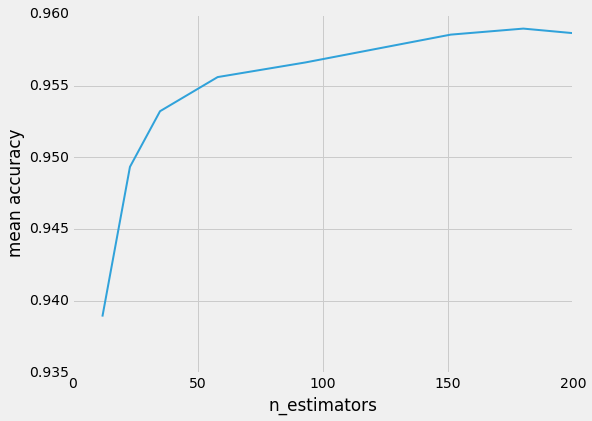

In [38]:
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.plot(ns, ss, linewidth=2, color=next(colors))
# plt.plot(gs_scores, "b*-")
# plt.axis('tight')
plt.xlabel('n_estimators')
plt.ylabel('mean accuracy')
# plt.legend(prop=dict(size=12))
plt.show()

In [41]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# specify parameters and distributions to sample from
param_grid = {
                'C': [0.001, 0.01, 0.1, 1,10,20,100,100]
                }

# param_dist = {"max_depth": [3, 5, None],
#               "max_features": sp_randint(1, 15),
#               "min_samples_split": sp_randint(1, 15),
#               "min_samples_leaf": sp_randint(1, 15),
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, n_jobs=4)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.grid_scores_)))
report(grid_search.grid_scores_)

GridSearchCV took 15.53 seconds for 8 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.926 (std: 0.024)
Parameters: {'C': 10}

Model with rank: 2
Mean validation score: 0.926 (std: 0.023)
Parameters: {'C': 20}

Model with rank: 3
Mean validation score: 0.926 (std: 0.020)
Parameters: {'C': 100}



[(0.001, 0.81686000000000003), (0.01, 0.82974000000000003), (0.1, 0.88339999999999996), (1, 0.91705999999999999), (10, 0.92612000000000005), (20, 0.92588000000000004), (100, 0.92571999999999999), (100, 0.92571999999999999)]


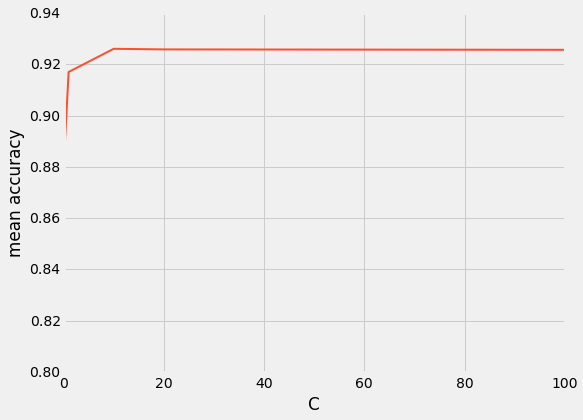

In [45]:
gs_scores = [(score.parameters['C'],score.mean_validation_score) for score in grid_search.grid_scores_]
print gs_scores
ns = [s[0] for s in gs_scores]
ss = [s[1] for s in gs_scores]

plt.figure(1, figsize=(8, 6))
plt.clf()
plt.plot(ns, ss, linewidth=2, color=next(colors))
plt.xlabel('C')
plt.ylabel('mean accuracy')
plt.show()

In [10]:
# Utility function to report best scores
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

In [18]:
from sklearn.svm import LinearSVC
from time import time

clf = LinearSVC()
# specify parameters and distributions to sample from
param_grid = {
                'C': [0.001, 0.01, 0.1,0.5,1,1.5, 10,20,100,100]
                }

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, n_jobs=4)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.grid_scores_)))
report(grid_search.grid_scores_)

GridSearchCV took 52.02 seconds for 10 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.926 (std: 0.023)
Parameters: {'C': 1}

Model with rank: 2
Mean validation score: 0.926 (std: 0.022)
Parameters: {'C': 1.5}

Model with rank: 3
Mean validation score: 0.926 (std: 0.019)
Parameters: {'C': 10}



[(0.001, 0.82186000000000003), (0.01, 0.87287999999999999), (0.1, 0.91488000000000003), (0.5, 0.92481999999999998), (1, 0.92603999999999997), (1.5, 0.92601999999999995), (10, 0.92596000000000001), (20, 0.92596000000000001), (100, 0.92400000000000004), (100, 0.92581999999999998)]


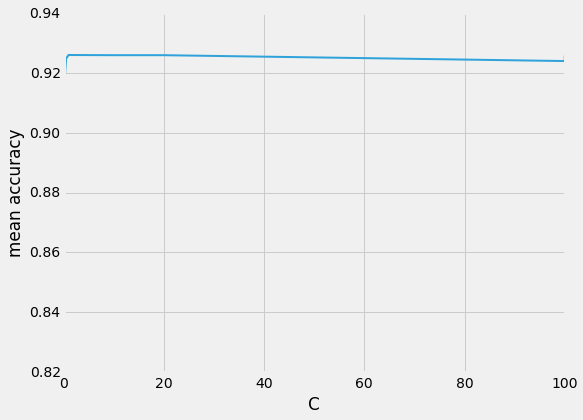

In [19]:
gs_scores = [(score.parameters['C'],score.mean_validation_score) for score in grid_search.grid_scores_]
print gs_scores
ns = [s[0] for s in gs_scores]
ss = [s[1] for s in gs_scores]

plt.figure(1, figsize=(8, 6))
plt.clf()
plt.plot(ns, ss, linewidth=2, color=next(colors))
plt.xlabel('C')
plt.ylabel('mean accuracy')
plt.show()